In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy import crs as ccrs
from datetime import datetime
from metpy.plots import USCOUNTIES

In [34]:
# Map parameters
domain=[-81.87, -71.87, 40.5, 45.5]
plotCities=True
cities=[{'Name':'Watkins Glen', 'Lat':42.38, 'Lon':-76.87}, {'Name':'Binghamton', 'Lat':42.10, 'Lon':-75.92}, 
                {'Name':'Syracuse', 'Lat':43.04, 'Lon':-76.17}, {'Name':'Rochester', 'Lat':43.16, 'Lon':-77.61}, 
                {'Name':'Albany', 'Lat':42.65, 'Lon':-73.76}, {'Name':'Saranac Lake', 'Lat':44.33, 'Lon':-74.13}, 
                {'Name':'Watertown', 'Lat':43.97, 'Lon':-75.91}, {'Name':'Buffalo', 'Lat':42.89, 'Lon':-78.88},
                {'Name':'Toronto', 'Lat':43.65, 'Lon':-79.38}, {'Name':'Cleveland', 'Lat':41.50, 'Lon':-81.69},
                {'Name':'Scranton', 'Lat':41.41, 'Lon':-75.66}, {'Name':'Erie', 'Lat':42.12, 'Lon':-80.09}, 
                {'Name':'Springfield', 'Lat':42.08, 'Lon':-72.59}, {'Name':'Burlington', 'Lat':44.48, 'Lon':-73.21}, 
                {'Name':'State College', 'Lat':40.79, 'Lon':-77.86}]

In [35]:
# Read in data
torn = pd.read_csv('https://www.spc.noaa.gov/climo/reports/today_raw_torn.csv', skiprows=[0])
hail = pd.read_csv('https://www.spc.noaa.gov/climo/reports/today_raw_hail.csv', skiprows=[0])
wind = pd.read_csv('https://www.spc.noaa.gov/climo/reports/today_raw_wind.csv', skiprows=[0])

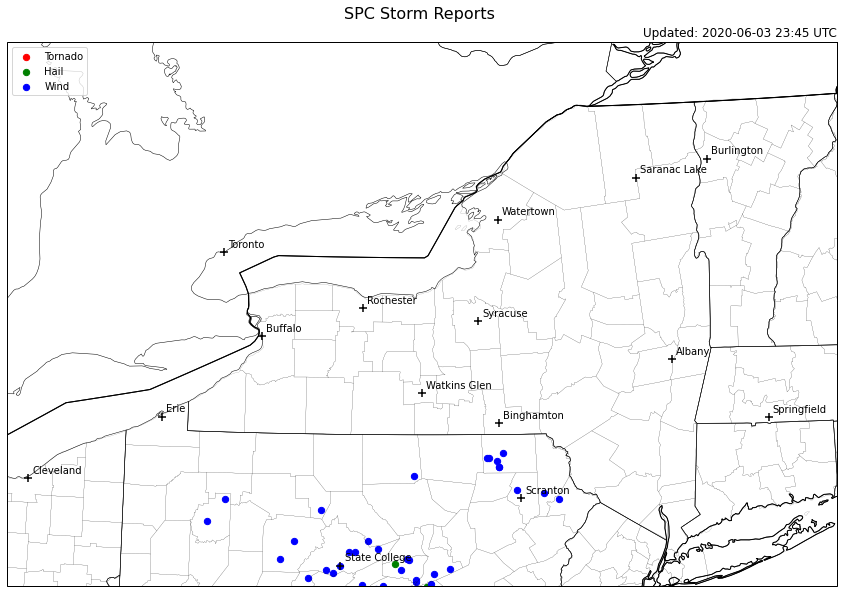

In [37]:
# set up the figure
fig = plt.figure(figsize=(18, 10))

# Generate an Cartopy projection
crs=ccrs.PlateCarree()
proj = ccrs.Stereographic(central_longitude=(domain[1]-domain[0])/2+domain[0], central_latitude=(domain[3]-domain[2])/2+domain[2])
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent(domain, crs=crs)

# Plot LSRs
t=plt.scatter(torn['LON'], torn['LAT'], marker='o', c='r', s=40, label='Tornado', transform=ccrs.Geodetic())
h=plt.scatter(hail['LON'], hail['LAT'], marker='o', c='g', s=40, label='Hail', transform=ccrs.Geodetic())
w=plt.scatter(wind['LON'], wind['LAT'], marker='o', c='b', s=40, label='Wind', transform=ccrs.Geodetic())

# Add legend
ax.legend(handles=[t, h, w], loc='upper left')

# Add geographic features
country_borders=cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='10m', facecolor='none')
ax.add_feature(country_borders, edgecolor='black', linewidth=1.0)
state_borders=cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='10m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=0.5)
ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='black', linewidth=0.1)

# Add Places
if plotCities:
    for city in cities:
        ax.scatter(city['Lon'], city['Lat'], marker='+', c='k', s=50, transform=ccrs.Geodetic())
        ax.text(city['Lon']+0.05, city['Lat']+0.05, city['Name'], transform=ccrs.Geodetic())

# Add Headers
plt.title('weather.carterhumphreys.com', loc='left')
plt.title(f'Updated: {datetime.utcnow().strftime("%Y-%m-%d %H:%M UTC")}', loc='right')
plt.suptitle(f'SPC Storm Reports', fontsize=16, x=0.51, y=0.93)

plt.show()

# Export fig and close
exportPath='/home/humphreys/weather.carterhumphreys.com/bin/SPC/'
#fig.savefig(f'{exportPath}/spc_storm_reports.png', bbox_inches='tight', dpi=100)
#plt.clf()